<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [16]:
# Generate the uniform samples
N = [2, 5, 20]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))

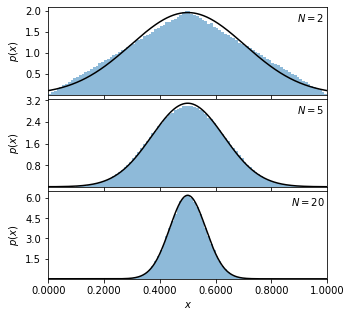

In [17]:
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()